<h2 style='color:blue' align='center'>Quad Leaders Image Classification<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h3 style='color:purple'>(1) Preprocessing: Detect face and eyes</h3>

Using haar cascade from opencv for this. 

In [2]:
img = cv2.imread(r"C:\Users\vinam\OneDrive\Pictures\Camera Roll\WIN_20220622_19_55_27_Pro.jpg")
img.shape

(720, 1280, 3)

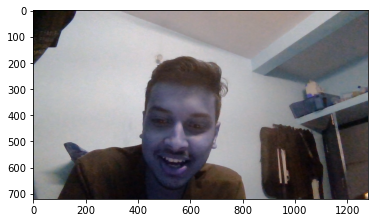

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [5]:
gray

array([[  7,   7,   6, ..., 102, 102, 103],
       [  6,   6,   6, ...,  97,  99, 100],
       [  5,   5,   5, ...,  93,  94,  94],
       ...,
       [ 86,  87,  87, ..., 113, 116, 114],
       [ 88,  88,  87, ..., 118, 123, 122],
       [ 89,  89,  88, ..., 113, 117, 115]], dtype=uint8)

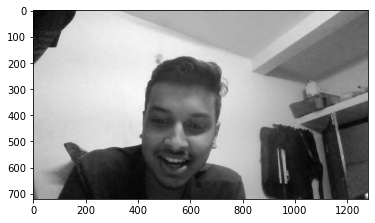

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[379, 296, 357, 357]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(379, 296, 357, 357)

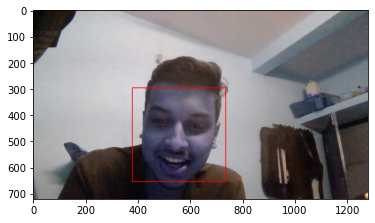

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

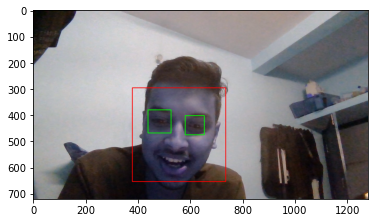

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

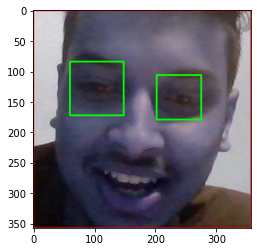

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(357, 357, 3)

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### Wavelet transform

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

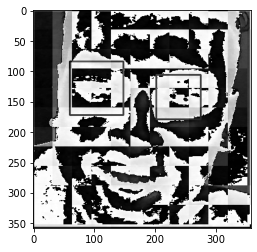

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

<h3 style='color:purple'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

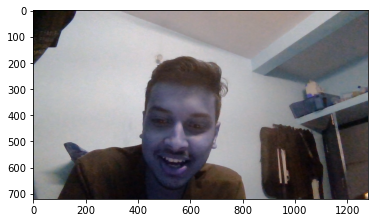

In [16]:
original_image = cv2.imread(r"C:\Users\vinam\OneDrive\Pictures\Camera Roll\WIN_20220622_19_55_27_Pro.jpg")
plt.imshow(original_image)

TypeError: Image data of dtype object cannot be converted to float

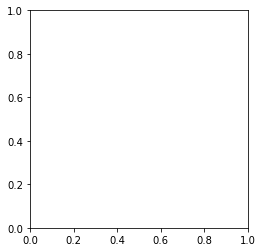

In [17]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\vinam\OneDrive\Pictures\Camera Roll\WIN_20220622_19_55_25_Pro.jpg")
plt.imshow(cropped_image)

**In below image face is not very clear and it doesn't have two eyes clearly visible**

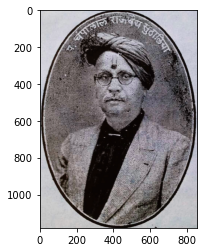

In [18]:
org_image_obstructed = cv2.imread(r"C:\Users\vinam\OneDrive\Pictures\cb.jpg")
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"C:\Users\vinam\OneDrive\Pictures\Camera Roll\WIN_20220622_19_55_25_Pro.jpg")
cropped_image_no_2_eyes

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [20]:
path_to_data = r"C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders"
path_to_cr_data = r"C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders\crop"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop',
 'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\Fumio Kishida',
 'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\Joe Biden',
 'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\Narendra Modi',
 'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\Scott Morrison']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
leader_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    leader_name = img_dir.split('\\')[-1]
    leader_file_names_dict[leader_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data+ "\\" + leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = leader_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            leader_file_names_dict[leader_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders\crop\Fumio Kishida
Generating cropped images in folder:  C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders\crop\Joe Biden
Generating cropped images in folder:  C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders\crop\Narendra Modi
Generating cropped images in folder:  C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders\crop\Scott Morrison


### Manually examine cropped folder and delete any unwanted images.......

In [52]:
leader_file_names_dict = {}
for img_dir in cropped_image_dirs:
    leader_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    leader_file_names_dict[leader_name] = file_list
leader_file_names_dict

{'Fumio Kishida': ['C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida1.png',
  'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida10.png',
  'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida11.png',
  'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida12.png',
  'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida13.png',
  'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida14.png',
  'C:\\Users\\vinam\\OneDrive\\Documents\\CelebrityFaceRecognition\\images_dataset\\Quad Leaders\\crop\\Fumio Kishida\\Fumio Kishida15.png

In [53]:
class_dict = {}
count = 0
for ld_name in leader_file_names_dict.keys():
    class_dict[ld_name] = count
    count = count + 1
class_dict

{'Fumio Kishida': 0, 'Joe Biden': 1, 'Narendra Modi': 2, 'Scott Morrison': 3}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [54]:
X, y = [], []
for leader_name, training_files in leader_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[leader_name])     

In [55]:
len(X[0])

4096

In [56]:
32*32*3 + 32*32

4096

In [57]:
X[0]

array([[160],
       [162],
       [174],
       ...,
       [249],
       [251],
       [251]], dtype=uint8)

In [58]:
y[0]

0

In [59]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(322, 4096)

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [60]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.9135802469135802

In [64]:

print(pipe.predict(X_test))


[3 0 0 3 1 1 1 2 0 2 2 2 1 2 2 0 3 3 1 3 2 0 2 2 0 2 3 3 0 0 2 3 0 2 0 3 2
 0 1 1 1 2 1 0 3 1 1 2 2 2 3 3 0 0 0 1 3 0 3 2 0 3 0 0 2 2 3 2 2 0 0 3 0 2
 1 1 1 0 3 2 1]


### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [65]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [66]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [67]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.933418,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.734014,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.904592,{'logisticregression__C': 1}


In [68]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [69]:
best_estimators['svm'].score(X_test,y_test)

0.9259259259259259

In [70]:
best_estimators['random_forest'].score(X_test,y_test)

0.7777777777777778

In [71]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9382716049382716

In [85]:
best_clf = best_estimators['svm']

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[23,  0,  0,  3],
       [ 0, 17,  0,  2],
       [ 0,  0, 24,  0],
       [ 0,  1,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

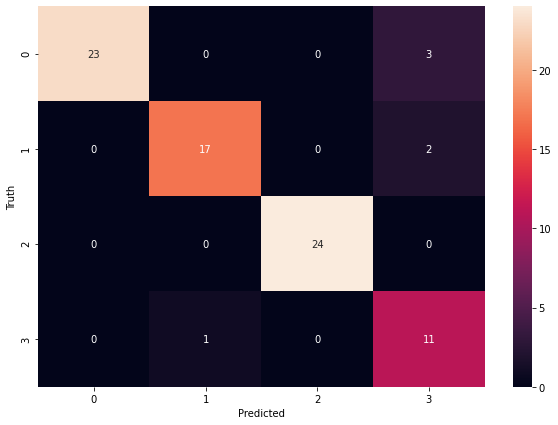

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
class_dict

{'Fumio Kishida': 0, 'Joe Biden': 1, 'Narendra Modi': 2, 'Scott Morrison': 3}

### Save the trained model

In [89]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [90]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))
    

In [91]:

import numpy as np
import cv2

__class_name_to_number = class_dict
__class_number_to_name = __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

__model = best_clf

def classify_image(file_path):

    imgs = get_cropped_image_if_2_eyes(file_path)

    result = []
    
    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

    len_image_array = 32*32*3 + 32*32

    final = combined_img.reshape(1,len_image_array).astype(float)
    result.append({
    'class': class_number_to_name(__model.predict(final)[0]),
    'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
    })

    return result

def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

In [92]:
print(classify_image(r"C:\Users\vinam\OneDrive\Documents\CelebrityFaceRecognition\images_dataset\Quad Leaders\Narendra Modi\NarendraModi1.jpg"))

[{'class': 'Scott Morrison', 'class_probability': [1.68, 1.79, 0.13, 96.39]}]
